In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import open_cp.scripted.analysis as analysis
import numpy as np

In [2]:
def ordered_by_name(name, betas):
    bs = {k:v for k,v in betas.items() if analysis.parse_prediction_key(k).name == name}
    coverages, max_by_cov = analysis.compute_betas_means_against_max(bs, range(1, 21))
    maxes = [(k,np.mean(v)) for k,v in max_by_cov.items()]
    maxes.sort(key = lambda pr : -pr[1])
    return maxes

## Sample plots

In [3]:
betas = analysis.hit_counts_to_beta("hotspots.csv")
betas2 = analysis.hit_counts_to_beta("hotspots2.csv")
betas3 = analysis.hit_counts_to_beta("hotspots3.csv")

In [4]:
{analysis.parse_prediction_key(key).name for key in betas}

{'KDEProvider',
 'NaiveProvider',
 'ProHotspotCtsProvider',
 'ProHotspotProvider',
 'RetroHotspotCtsProvider',
 'RetroHotspotProvider',
 'STScanProvider'}

In [5]:
want = []
for name in {analysis.parse_prediction_key(key).name for key in betas}:
    maxes = ordered_by_name(name, betas)
    key = maxes[0][0]
    want.append(key)

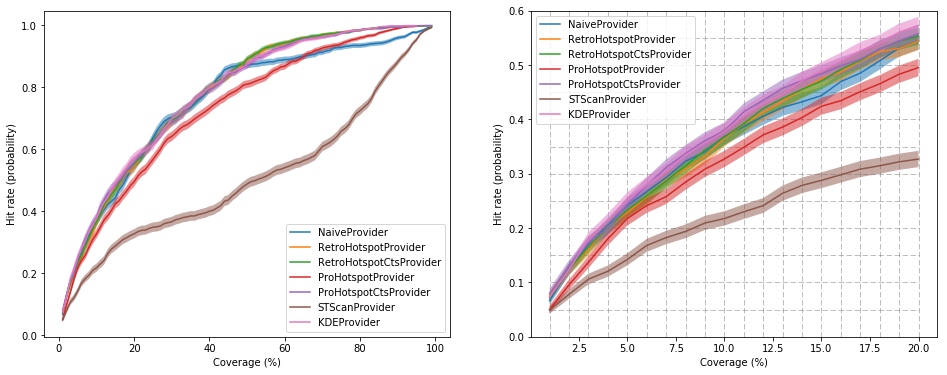

In [6]:
bs = {k:v for k,v in betas.items() if k in want}

fig, axes = plt.subplots(ncols=2, figsize=(16,6))
analysis.plot_betas(bs, axes[0])
analysis.plot_betas(bs, axes[1], coverages=range(1,21))
axes[1].set(ylim=[0,0.6])

for ax, loc in zip(axes, [4, 2]):
    ax.legend([analysis.parse_prediction_key(k).name for k in bs], loc=loc)
ax = axes[1]
for y in range(15):
    ax.plot([1, 20], [y/20, y/20], linewidth=0.5, linestyle="--", alpha=0.5, color="black", zorder=-20)
for x in np.linspace(1, 20, 20):
    ax.plot([x, x], [0, 0.7], linewidth=0.5, linestyle="--", alpha=0.5, color="black", zorder=-20)

# KDE for each data-set

In [7]:
keys1 = [ordered_by_name("KDEProvider", b)[0][0]
        for b in [betas, betas2, betas3]]
keys2 = [ordered_by_name("STScanProvider", b)[0][0]
        for b in [betas, betas2, betas3]]

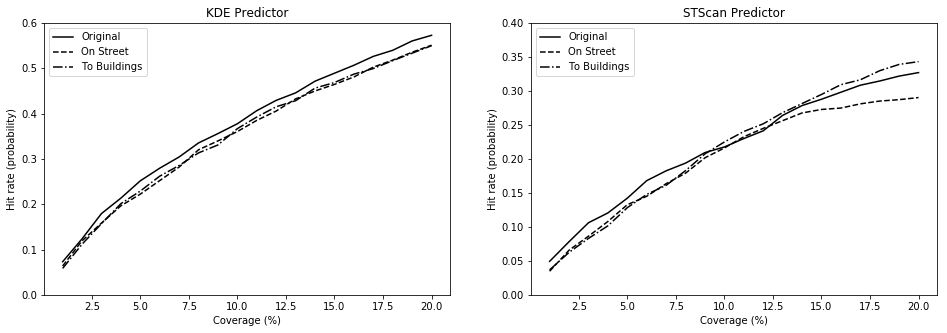

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(16,5))

bs = {name : b[k] for name, b, k in zip(["Original", "On Street", "To Buildings"],
    [betas, betas2, betas3], keys1)}
analysis.plot_betas(bs, axes[0], coverages=range(1,21), plot_sds=False)
axes[0].set_title("KDE Predictor")
axes[0].set(ylim=[0,0.6])

bs = {name : b[k] for name, b, k in zip(["Original", "On Street", "To Buildings"],
    [betas, betas2, betas3], keys2)}
analysis.plot_betas(bs, axes[1], coverages=range(1,21), plot_sds=False)
axes[1].set_title("STScan Predictor")
axes[1].set(ylim=[0,0.4])

for ax in axes:
    for line in ax.lines:
        line.set_color("black")
    ax.lines[1].set_linestyle("--")
    ax.lines[2].set_linestyle("-.")
    ax.legend(list(bs.keys()))

In [9]:
fig.savefig("../article/hit_rates.pdf")